In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
y = dataset.iloc[:,0].values
x = dataset.iloc[:,1:].values.reshape(-1,28,28,1)

x = x.astype('float32')
y = y.astype('float32')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.1)

In [4]:
np.random.seed(2)

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
x_train.shape

(37800, 28, 28, 1)

In [7]:
y_train.shape

(37800,)

In [8]:
x_test.shape

(4200, 28, 28, 1)

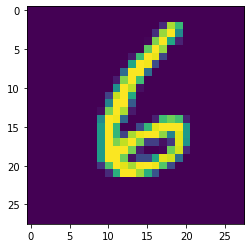

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[111][:,:,0])

In [10]:
import keras
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

def CNN_model():
    model = Sequential([
        Convolution2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Dropout(0.45),
        Convolution2D(64,(3,3), activation='relu',padding = 'same'),
        Convolution2D(64,(3,3), activation='relu',padding = 'same'),
        MaxPooling2D(),
        Dropout(0.45),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
    return model

In [11]:
model = CNN_model()

In [12]:
model.fit(x_train,y_train, epochs = 30)

Epoch 1/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.1946 - accuracy: 0.9374
Epoch 2/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0711 - accuracy: 0.9772
Epoch 3/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0538 - accuracy: 0.9835
Epoch 4/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0471 - accuracy: 0.9848
Epoch 5/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0408 - accuracy: 0.9871
Epoch 6/30
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0359 - accuracy: 0.9883
Epoch 7/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0316 - accuracy: 0.9904
Epoch 8/30
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0289 - accuracy: 0.9914
Epoch 9/30
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0258 - accuracy: 0.9915
Epoch 10/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.023

In [13]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9923809523809524


In [14]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test = test.astype('float32')
test = test/255
test = test.iloc[:,:].values.reshape(-1,28,28,1)
y_d = model.predict(test)
y_d = np.argmax(y_d,axis = 1)
print(y_d)
sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
my_submission = pd.DataFrame({'ImageId':sub.ImageId,'Label': y_d})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

[2 0 9 ... 3 9 2]
